## Predicción de Precios de Vehículos Usados (Core)

Implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

- About Dataset
- Context
- Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. I built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

- Content
- This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. For ML projects, consider feature engineering on location columns such as long/lat. For previous listings, check older versions of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import json
from difflib import SequenceMatcher
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib


## 1. Carga y Exploración de Datos:

* Descargar y cargar el dataset.
* Realizar una exploración inicial para entender la estructura del dataset.
* Identificar valores faltantes, duplicados y outliers.

In [2]:
df = pd.read_csv('../../../data/vehicles.csv')
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [5]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93


In [7]:
num_duplicates = df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicates}")

Número de registros duplicados: 0


##  2. Limpieza y Preprocesamiento:

### Manejar valores faltantes.

In [8]:
## Eliminar columnas con exceso de valores nulos
df = df.drop(['county', 'size'], axis=1)

In [9]:
## Definir columnas categóricas y numéricas de interes
categorical_cols = ['manufacturer', 'type', 'fuel', 'transmission', 'drive', 'paint_color']
numeric_cols = ['odometer', 'year', 'price']


In [10]:

# Crear un DataFrame filtrado
df_filtered = df.dropna(subset=categorical_cols + numeric_cols)

# Mostrar cuántas filas fueron eliminadas
num_original = df.shape[0]
num_filtrado = df_filtered.shape[0]
print(f"Filas originales: {num_original}")
print(f"Filas después de filtrar valores faltantes: {num_filtrado}")
print(f"Filas eliminadas: {num_original - num_filtrado}")



Filas originales: 426880
Filas después de filtrar valores faltantes: 208061
Filas eliminadas: 218819


In [11]:
# Agrupar por columnas categóricas y calcular estadísticas descriptivas
grouped_df = df_filtered.groupby(categorical_cols)[numeric_cols].agg(['mean', 'std', 'median', 'count'])

# Aplanar el MultiIndex en las columnas
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

# Restablecer el índice
grouped_df = grouped_df.reset_index()


In [12]:
# Calcular el coeficiente de variación para las columnas numéricas
for col in numeric_cols:
    std_col = f"{col}_std"
    mean_col = f"{col}_mean"
    cv_col = f"{col}_cv"

    # Evitar divisiones por cero
    grouped_df[cv_col] = grouped_df[std_col] / grouped_df[mean_col].replace({0: pd.NA})

# Reemplazar NaN en coeficientes de variación con 0
grouped_df.fillna({f"{col}_cv": 0 for col in numeric_cols}, inplace=True)


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\1026189176.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grouped_df.fillna({f"{col}_cv": 0 for col in numeric_cols}, inplace=True)


In [13]:
# Guardar las estadísticas agrupadas en un archivo CSV
grouped_df.to_csv('craigslist_statistics_grouped.csv', index=False)
print("\nEstadísticas agrupadas guardadas en 'craigslist_statistics_grouped.csv'.")

# Mostrar las primeras filas donde hay al menos dos valores en el cálculo
print("\nPrimeras filas del DataFrame agrupado:")
print(grouped_df[grouped_df[f"{numeric_cols[0]}_count"] > 1])



Estadísticas agrupadas guardadas en 'craigslist_statistics_grouped.csv'.

Primeras filas del DataFrame agrupado:
      manufacturer   type   fuel transmission drive paint_color  \
0            acura    SUV    gas    automatic   4wd       black   
1            acura    SUV    gas    automatic   4wd        blue   
2            acura    SUV    gas    automatic   4wd       brown   
3            acura    SUV    gas    automatic   4wd      custom   
4            acura    SUV    gas    automatic   4wd       green   
...            ...    ...    ...          ...   ...         ...   
10501        volvo  wagon    gas    automatic   rwd       white   
10507        volvo  wagon    gas        other   fwd       black   
10508        volvo  wagon    gas        other   fwd         red   
10511        volvo  wagon  other    automatic   fwd       white   
10512        volvo  wagon  other        other   fwd         red   

       odometer_mean  odometer_std  odometer_median  odometer_count  ...  \
0    

In [14]:
# Filtrar grupos con CV bajo y conteo alto
filtered_groups = grouped_df[
    (grouped_df['odometer_cv'] < 0.5) & (grouped_df['odometer_count'] > 10)
]
print(filtered_groups)


      manufacturer   type fuel transmission drive paint_color  odometer_mean  \
1            acura    SUV  gas    automatic   4wd        blue  157357.703704   
3            acura    SUV  gas    automatic   4wd      custom  136233.416667   
5            acura    SUV  gas    automatic   4wd        grey  119489.790000   
9            acura    SUV  gas    automatic   4wd      silver  120437.658537   
11           acura    SUV  gas    automatic   fwd       black   76880.435897   
...            ...    ...  ...          ...   ...         ...            ...   
10487        volvo  wagon  gas    automatic   4wd      silver  150948.277778   
10488        volvo  wagon  gas    automatic   4wd       white  137577.272727   
10491        volvo  wagon  gas    automatic   fwd       brown   79262.100000   
10493        volvo  wagon  gas    automatic   fwd        grey  139519.076923   
10496        volvo  wagon  gas    automatic   fwd       white  121493.666667   

       odometer_std  odometer_median  o

In [15]:
# Convertir el DataFrame agrupado en un diccionario para búsquedas rápidas
grouped_dict = grouped_df.set_index(['manufacturer', 'type', 'fuel', 'transmission', 'drive', 'paint_color']).to_dict(orient='index')


Manejar valores faltantes en columnas categóricas

In [16]:
for col in ['manufacturer', 'condition', 'cylinders', 'fuel', 'drive', 'type', 'paint_color']:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\1491168040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Manejar valores faltantes en columnas numéricas

In [17]:
def imputar_faltantes(row, col):
    key = (row['manufacturer'], row['type'], row['fuel'], row['transmission'], row['drive'], row['paint_color'])
    if key in grouped_dict and f"{col}_median" in grouped_dict[key]:
        return grouped_dict[key][f"{col}_median"]
    return row[col]  # Devolver el valor original si no se encuentra la combinación


In [18]:
for col in ['year', 'odometer', 'lat', 'long','posting_date']:
    df[col] = df.apply(lambda row: imputar_faltantes(row, col) if pd.isnull(row[col]) else row[col], axis=1)


In [19]:
df['VIN'].fillna('unknown', inplace=True)
df['description'].fillna('no_description', inplace=True)
df['image_url'].fillna('no_image', inplace=True)


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\2782870608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VIN'].fillna('unknown', inplace=True)
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\2782870608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [20]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
transmission,424324,2556,0.60
odometer,425835,1045,0.24
posting_date,426812,68,0.02
year,426784,96,0.02
manufacturer,426880,0,0.00
type,426880,0,0.00


In [21]:
### Eliminar filas para las categorias que quedaron con porcentaje bajo de valores faltantes
df = df.dropna(subset=['title_status', 'long', 'lat', 'model', 'transmission', 'odometer', 'year'])


In [22]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
id,405034,0,0.0
url,405034,0,0.0
long,405034,0,0.0
lat,405034,0,0.0
state,405034,0,0.0
description,405034,0,0.0
image_url,405034,0,0.0
paint_color,405034,0,0.0
type,405034,0,0.0
drive,405034,0,0.0


### Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [23]:
# Palabras clave para identificar el tipo de variable
numeric_keywords = ["Area", "Number", "Price", "Mileage", "Odometer"]
date_keywords = ["Year", "Month", "Day", "Date"]

# Función para determinar el tipo de variable
def determine_variable_type(column_name):
    if any(keyword.lower() in column_name.lower() for keyword in numeric_keywords):
        return "numeric"
    elif any(keyword.lower() in column_name.lower() for keyword in date_keywords):
        return "date"
    else:
        return "categorical"

# Crear un diccionario para las columnas
columns_data = {}
for column in df.columns:
    columns_data[column] = {
        "description": column,  # Aquí puedes añadir descripciones más detalladas si están disponibles
        "type": determine_variable_type(column)
    }

# Guardar el diccionario en un archivo JSON
with open("variable_dictionary.json", "w") as file:
    json.dump(columns_data, file, indent=4)
print("Diccionario de variables guardado como 'variable_dictionary.json'")


Diccionario de variables guardado como 'variable_dictionary.json'


In [24]:
# Cargar el diccionario de variables
with open("variable_dictionary.json", "r") as file:
    variable_dictionary = json.load(file)

# Recorrer las columnas y ajustar los tipos
for column, attributes in variable_dictionary.items():
    var_type = attributes["type"]
    subtype = attributes.get("subtype", None)  # Obtener subtipo si existe

    if var_type == "numeric":
        # Convertir a tipo numérico
        df[column] = pd.to_numeric(df[column], errors="coerce")
    elif var_type == "date":
        if "Year" in column:
            # Convertir a fecha y extraer el año
            df[column] = pd.to_datetime(df[column], format='%Y', errors="coerce").dt.year
        elif "Month" in column:
            # Convertir a fecha y extraer el mes
            df[column] = pd.to_datetime(df[column], format='%m', errors="coerce").dt.month
        elif "Day" in column:
            # Convertir a fecha y extraer el día
            df[column] = pd.to_datetime(df[column], format='%d', errors="coerce").dt.day
        else:
            # Convertir a fecha general si no hay subtipo definido
            df[column] = pd.to_datetime(df[column], errors="coerce")
    elif var_type == "categorical":
        # Convertir a tipo categórico
        df[column] = df[column].astype("category")


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\1786934426.py:25: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[column] = pd.to_datetime(df[column], errors="coerce")


In [25]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d', errors="coerce")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405034 entries, 27 to 426879
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype                    
---  ------        --------------   -----                    
 0   id            405034 non-null  category                 
 1   url           405034 non-null  category                 
 2   region        405034 non-null  category                 
 3   region_url    405034 non-null  category                 
 4   price         405034 non-null  int64                    
 5   year          405034 non-null  datetime64[ns]           
 6   manufacturer  405034 non-null  category                 
 7   model         405034 non-null  category                 
 8   condition     405034 non-null  category                 
 9   cylinders     405034 non-null  category                 
 10  fuel          405034 non-null  category                 
 11  odometer      405034 non-null  float64                  
 12  title_status  405034

In [27]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
posting_date,96509,308525,76.17
url,405034,0,0.00
long,405034,0,0.00
lat,405034,0,0.00
state,405034,0,0.00
description,405034,0,0.00
image_url,405034,0,0.00
paint_color,405034,0,0.00
type,405034,0,0.00
drive,405034,0,0.00


In [28]:
# Calcular la mediana de 'posting_date' (en formato datetime)
median_posting_date = df['posting_date'].median()

# Imputar valores faltantes con la mediana
df['posting_date'].fillna(median_posting_date, inplace=True)

print(f"Mediana de 'posting_date': {median_posting_date}")
print("Valores faltantes imputados correctamente.")

Mediana de 'posting_date': 2021-04-25 09:21:42-05:00
Valores faltantes imputados correctamente.


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\410420471.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['posting_date'].fillna(median_posting_date, inplace=True)


In [29]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
id,405034,0,0.0
url,405034,0,0.0
long,405034,0,0.0
lat,405034,0,0.0
state,405034,0,0.0
description,405034,0,0.0
image_url,405034,0,0.0
paint_color,405034,0,0.0
type,405034,0,0.0
drive,405034,0,0.0


### Manejo de valores anomalos

In [30]:
df['price'].describe()

count    4.050340e+05
mean     6.293054e+04
std      1.123181e+07
min      0.000000e+00
25%      5.995000e+03
50%      1.399500e+04
75%      2.677700e+04
max      3.736929e+09
Name: price, dtype: float64

In [31]:
df['odometer'].describe()


count    4.050340e+05
mean     9.797243e+04
std      2.065770e+05
min      0.000000e+00
25%      3.800000e+04
50%      8.600000e+04
75%      1.339608e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [32]:
# Detectar valores atípicos
outliers = utils.detect_outliers_iqr(df)

# Revisar los resultados
for column, rows in outliers.items():
    print(f"\nValores atípicos detectados en la columna '{column}': {len(rows)} filas")
    print(rows.head())  # Mostrar las primeras filas con valores atípicos


Columna: price, Límite inferior: -25178.0, Límite superior: 57950.0
Columna: odometer, Límite inferior: -105941.125, Límite superior: 277901.875

Valores atípicos detectados en la columna 'price': 7409 filas
             id                                                url  \
204  7316691442  https://bham.craigslist.org/ctd/d/tuscaloosa-2...   
346  7315259946  https://bham.craigslist.org/ctd/d/cleveland-20...   
365  7314956487  https://bham.craigslist.org/ctd/d/springville-...   
461  7314044610  https://bham.craigslist.org/ctd/d/richmond-202...   
732  7311741403  https://bham.craigslist.org/cto/d/birmingham-j...   

         region                   region_url   price  \
204  birmingham  https://bham.craigslist.org   58977   
346  birmingham  https://bham.craigslist.org   98900   
365  birmingham  https://bham.craigslist.org   72900   
461  birmingham  https://bham.craigslist.org   99950   
732  birmingham  https://bham.craigslist.org  100000   

                             year 

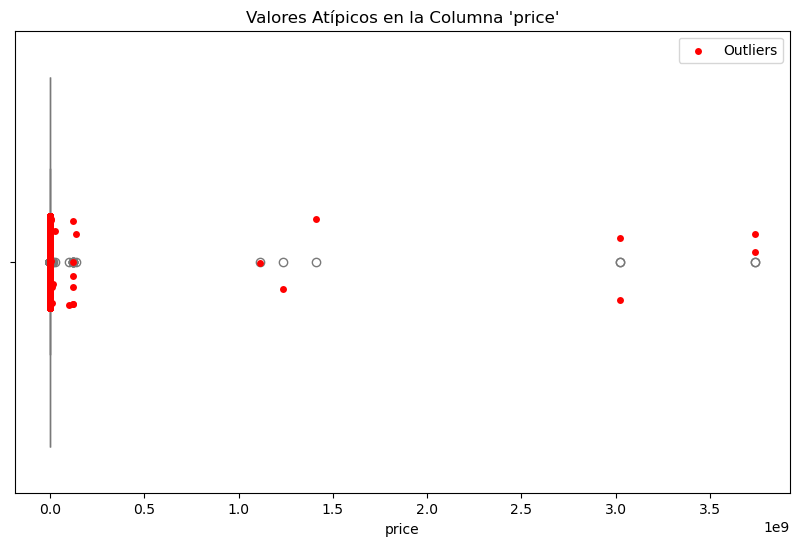

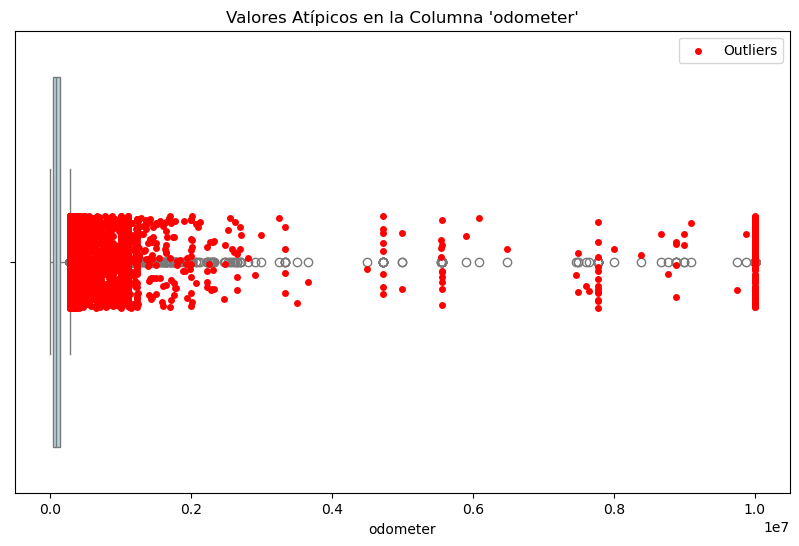

In [33]:
def visualize_outliers(df, outliers):
    """
    Visualiza los valores atípicos detectados en las columnas numéricas usando boxplots.

    Args:
        df (pd.DataFrame): DataFrame original.
        outliers (dict): Diccionario con columnas y las filas con valores atípicos.

    Returns:
        None
    """
    for column, rows in outliers.items():
        if not rows.empty:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column], color="lightblue")
            sns.stripplot(data=rows, x=rows[column], color="red", jitter=True, label="Outliers")
            plt.title(f"Valores Atípicos en la Columna '{column}'")
            plt.xlabel(column)
            plt.legend()
            plt.show()
        else:
            print(f"No se encontraron valores atípicos en la columna '{column}'.")

# Visualizar los valores atípicos detectados
visualize_outliers(df, outliers)

Existen valores extremadamente altos que claramente son atípicos (price > 1e9), lo cual no parece realista para el precio de vehículos.
También hay un gran grupo de valores cercanos a 0 que pueden ser placeholders o errores.

La columna tiene un rango muy amplio y valores extremadamente altos (odometer > 1e7), lo cual no parece razonable para vehículos usados.
También hay valores cercanos a 0 que podrían ser placeholders o errores.

In [34]:
# Filtrar precios razonables, por ejemplo, entre 1000 y 200,000
df = df[(df['price'] >= 1000) & (df['price'] <= 200000)]


In [35]:
# Filtrar kilometraje razonable, por ejemplo, entre 1,000 y 500,000 km
df = df[(df['odometer'] >= 1000) & (df['odometer'] <= 500000)]


In [36]:
print(f"Número de filas después de filtrar: {len(df)}")


Número de filas después de filtrar: 356947


### Corregir inconsistencias en los datos categóricos.

In [37]:
df.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-uni...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,33590,22590,39590,30990,15000
year,1970-01-01 00:00:00.000002014,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002020,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000002013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders


In [38]:
def find_similar_categories(categories, threshold=0.85):
    """
    Encuentra pares de categorías similares en una lista de categorías.

    Args:
        categories (list): Lista de categorías.
        threshold (float): Umbral de similitud (entre 0 y 1).

    Returns:
        dict: Mapeo de categorías similares.
    """
    categories = sorted(map(str, categories))  # Convertir categorías a cadenas y ordenar
    similar_map = {}
    for i, cat1 in enumerate(categories):
        for cat2 in categories[i + 1:]:
            similarity = SequenceMatcher(None, cat1, cat2).ratio()
            if similarity >= threshold:
                similar_map[cat2] = cat1  # Mapear cat2 a cat1
    return similar_map


In [39]:
def clean_categorical_variables(df, threshold=0.85, max_categories=100, exclude_columns=None):
    """
    Limpia las categorías de las variables categóricas en un DataFrame,
    unificando valores similares y manejando alta cardinalidad.

    Args:
        df (pd.DataFrame): DataFrame a procesar.
        threshold (float): Umbral de similitud para unificar categorías.
        max_categories (int): Máximo de categorías únicas para procesar una columna.
        exclude_columns (list): Lista de columnas a excluir del proceso.

    Returns:
        pd.DataFrame: DataFrame con categorías unificadas.
    """
    exclude_columns = exclude_columns or []

    for column in df.select_dtypes(include="category").columns:
        if column in exclude_columns:
            continue

        print(f"Procesando columna: {column}")

        # Limitar columnas con demasiadas categorías únicas
        if df[column].nunique() > max_categories:
            print(f"Columna '{column}' excluida por alta cardinalidad ({df[column].nunique()} categorías).")
            continue

        # Convertir valores categóricos a cadenas
        df[column] = df[column].astype(str).str.lower().str.strip()

        # Obtener categorías únicas
        unique_categories = df[column].unique()

        # Encontrar y aplicar mapeos para unificar categorías similares
        similar_map = find_similar_categories(unique_categories, threshold=threshold)

        if similar_map:
            print(f"Mapeo detectado en '{column}': {similar_map}")
            df[column] = df[column].replace(similar_map)

        # Reconstruir como categoría después del reemplazo
        df[column] = df[column].astype("category")

    return df


In [40]:
# Definir columnas a excluir
exclude_columns = ['id', 'url', 'image_url', 'VIN', 'price', 'year', 'odometer', 'lat', 'long', 'posting_date','cylinders']

# Aplicar la limpieza
df = clean_categorical_variables(df, threshold=0.85, max_categories=100, exclude_columns=exclude_columns)


Procesando columna: region
Columna 'region' excluida por alta cardinalidad (404 categorías).
Procesando columna: region_url
Columna 'region_url' excluida por alta cardinalidad (413 categorías).
Procesando columna: manufacturer
Procesando columna: model
Columna 'model' excluida por alta cardinalidad (25156 categorías).
Procesando columna: condition
Procesando columna: fuel
Procesando columna: title_status
Procesando columna: transmission
Procesando columna: drive
Procesando columna: type
Procesando columna: paint_color
Procesando columna: description
Columna 'description' excluida por alta cardinalidad (303850 categorías).
Procesando columna: state


## 3. Exploración de Datos

### Crear visualizaciones univariadas y multivariadas.

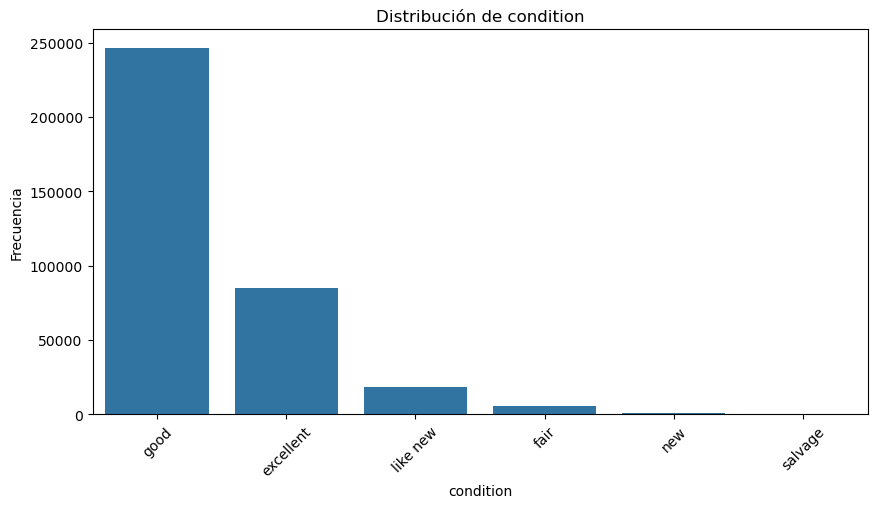

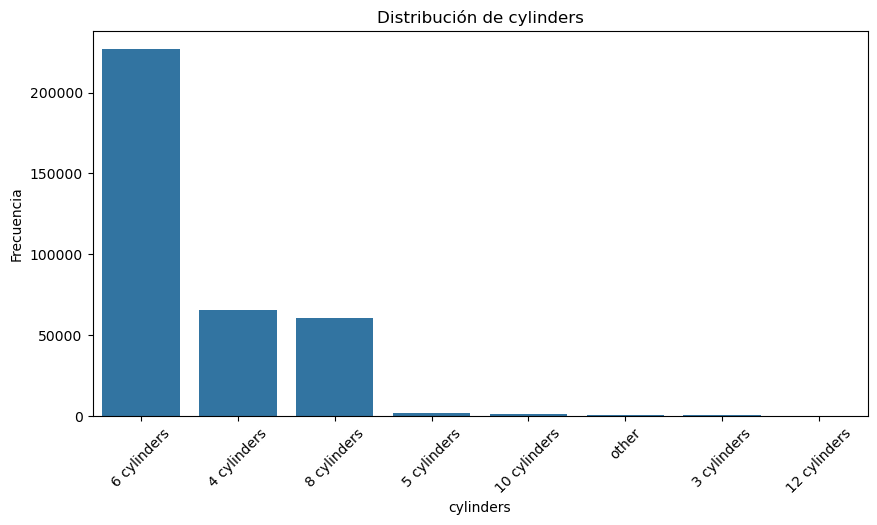

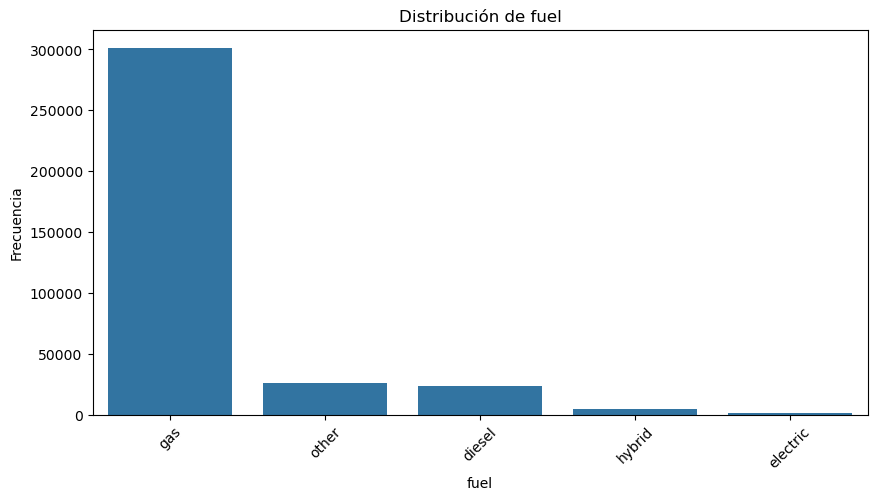

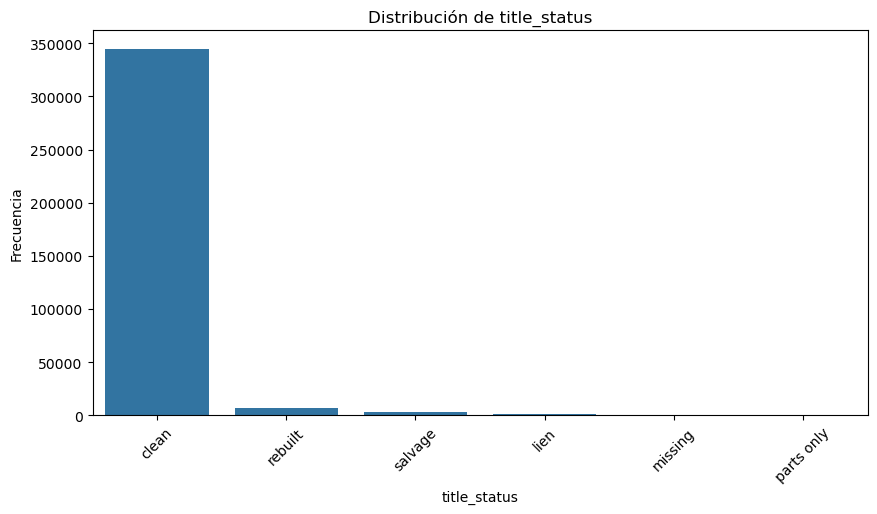

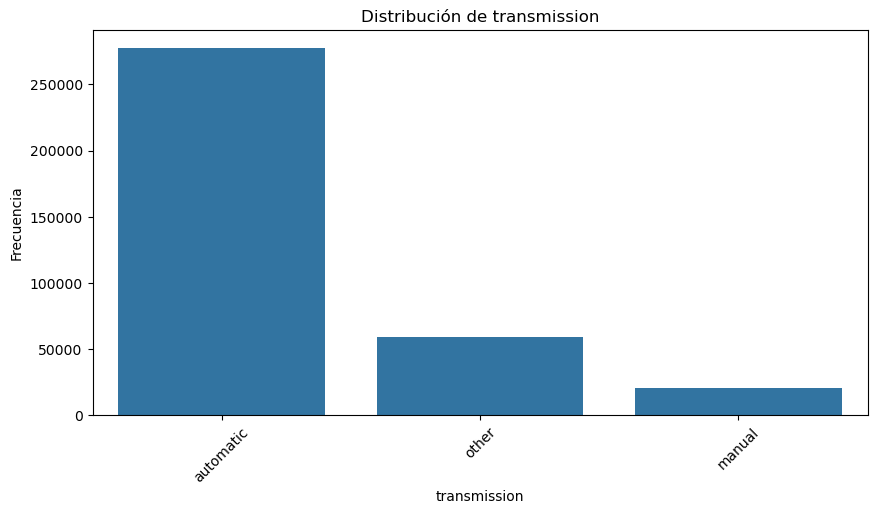

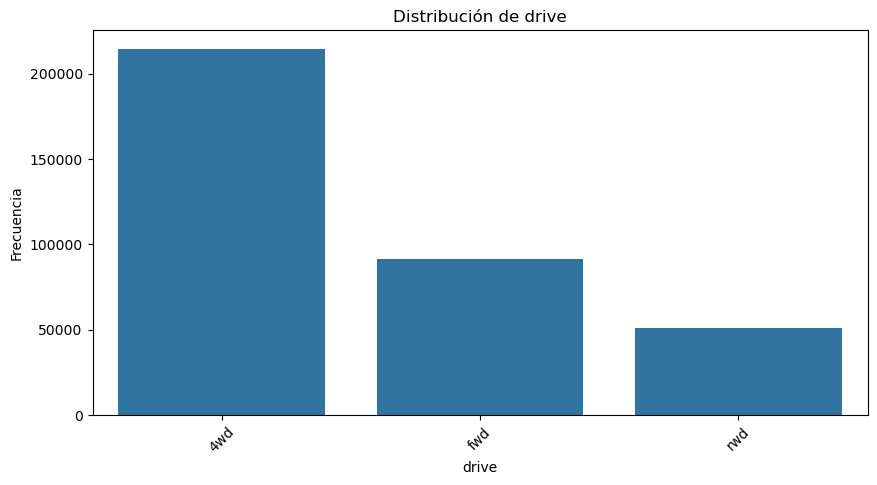

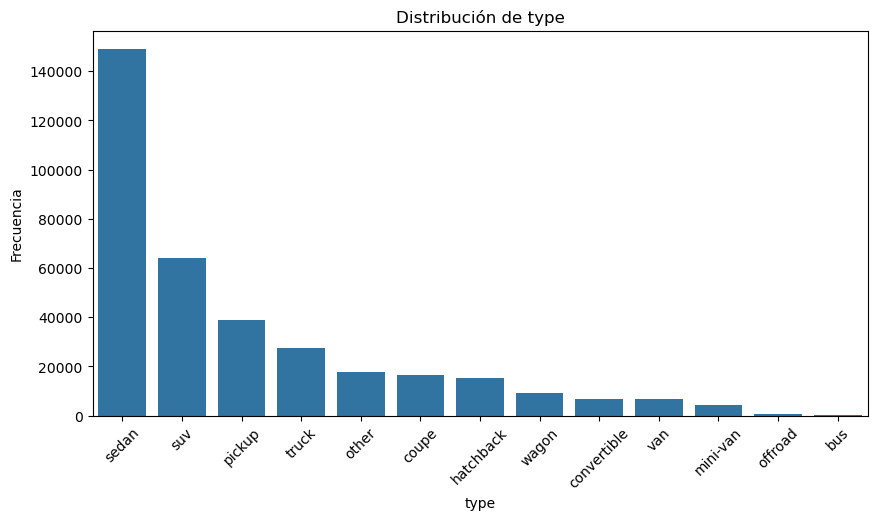

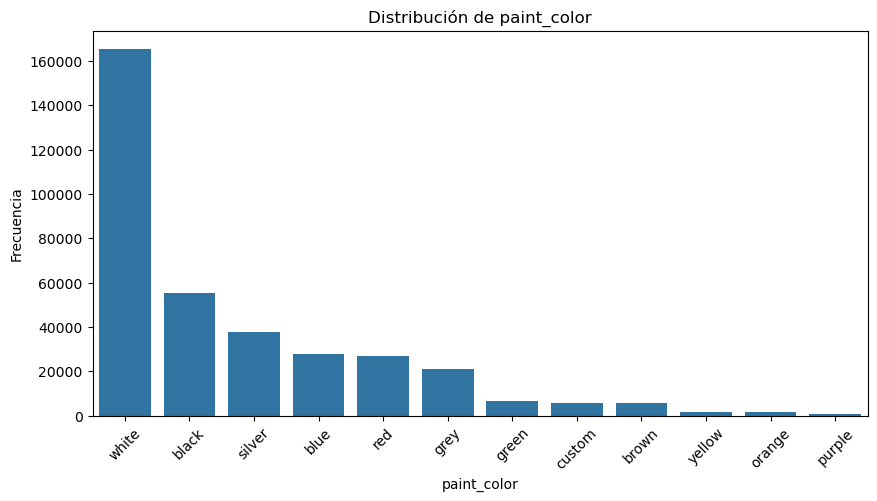

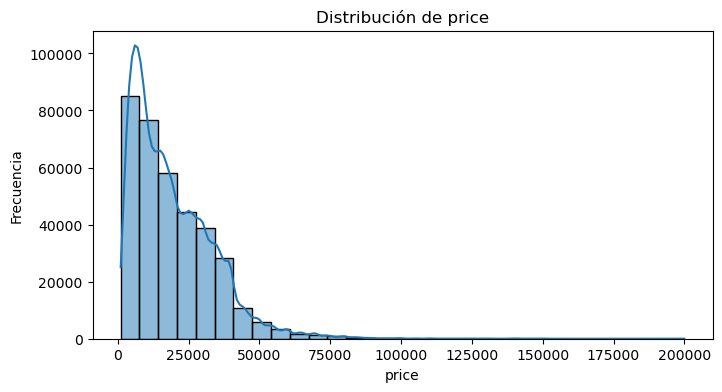

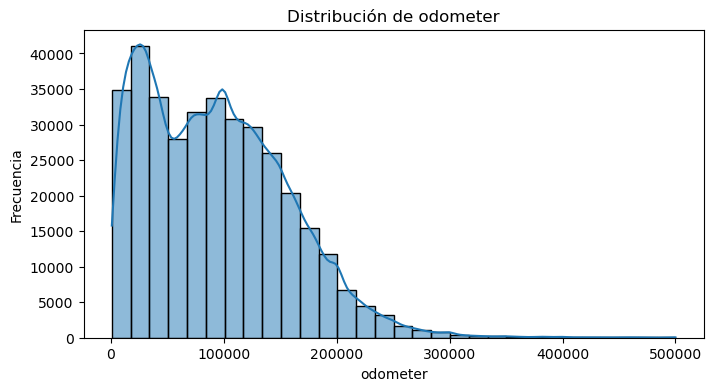

In [41]:
def univariate_analysis(df):
    """
    Crea visualizaciones univariadas para variables numéricas y categóricas.

    Args:
        df (pd.DataFrame): DataFrame a analizar.

    Returns:
        None
    """
    # Variables numéricas
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

def plot_categorical_columns(df, max_categories=20):
    """
    Grafica columnas categóricas con un número razonable de categorías únicas.

    Args:
        df (pd.DataFrame): DataFrame con datos.
        max_categories (int): Máximo de categorías únicas para graficar.

    Returns:
        None
    """
    # Seleccionar columnas categóricas con un número razonable de categorías únicas
    categorical_columns = [
        col for col in df.select_dtypes(include="category").columns
        if df[col].nunique() <= max_categories
    ]
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()

# Llamar a la función
plot_categorical_columns(df, max_categories=20)

# Llamar a la función
univariate_analysis(df)

- Distribución de la variable condition:

La mayoría de los vehículos están en "buenas condiciones" (good), seguidos por "excelente" (excellent). Las categorías "como nuevo" (like new), "regular" (fair), "nuevo" (new) y "salvaje" (savage) tienen menor representación.
- Distribución de la variable cylinders:

Los vehículos con 6 cilindros son los más comunes, seguidos por los de 4 y 8 cilindros. Las categorías de 5, 10, 3 y 12 cilindros, así como "otro" (other), tienen muy poca representación.
- Distribución de la variable fuel:

La gasolina (gas) es el tipo de combustible predominante, con mucha mayor frecuencia que diésel, híbridos, eléctricos u "otros" (other).
- Distribución de la variable transmission:

La transmisión automática es la más frecuente, seguida por "otra" (other) y finalmente manual.
Distribución de la variable drive:

La mayoría de los vehículos tienen tracción en las cuatro ruedas (4wd), seguidos por tracción delantera (fwd) y tracción trasera (rwd).
- Distribución de la variable type:

Los sedanes (sedan) son el tipo más común de vehículos, seguidos por SUVs, pickups y camiones (truck). Otras categorías como coupés, hatchbacks, convertibles, y buses tienen menor frecuencia.
- Distribución de la variable paint_color:

El blanco es el color de pintura más común, seguido por negro, plata, azul y rojo. Colores como amarillo, naranja, y púrpura son muy poco frecuentes.
- Distribución de la variable price:

La mayoría de los vehículos tienen un precio que oscila entre $0 y $25,000, con una disminución significativa en frecuencias para precios más altos.
- Distribución de la variable odometer:

La mayoría de los vehículos tienen un kilometraje menor a 100,000, con frecuencias decrecientes para mayores valores de odómetro.

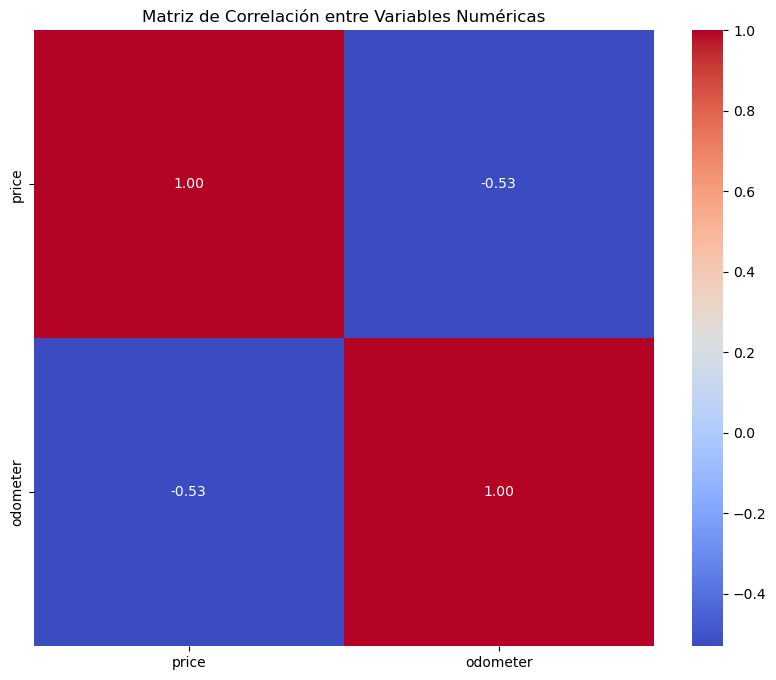

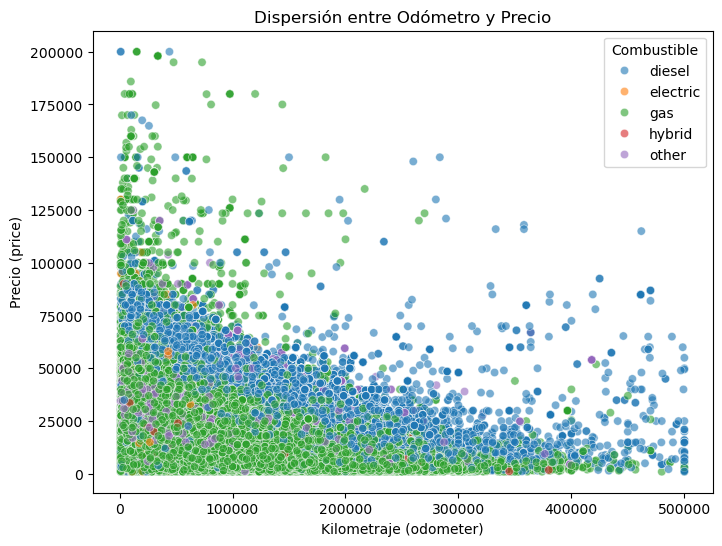

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_26776\3029322518.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='price', showfliers=False, palette='muted')


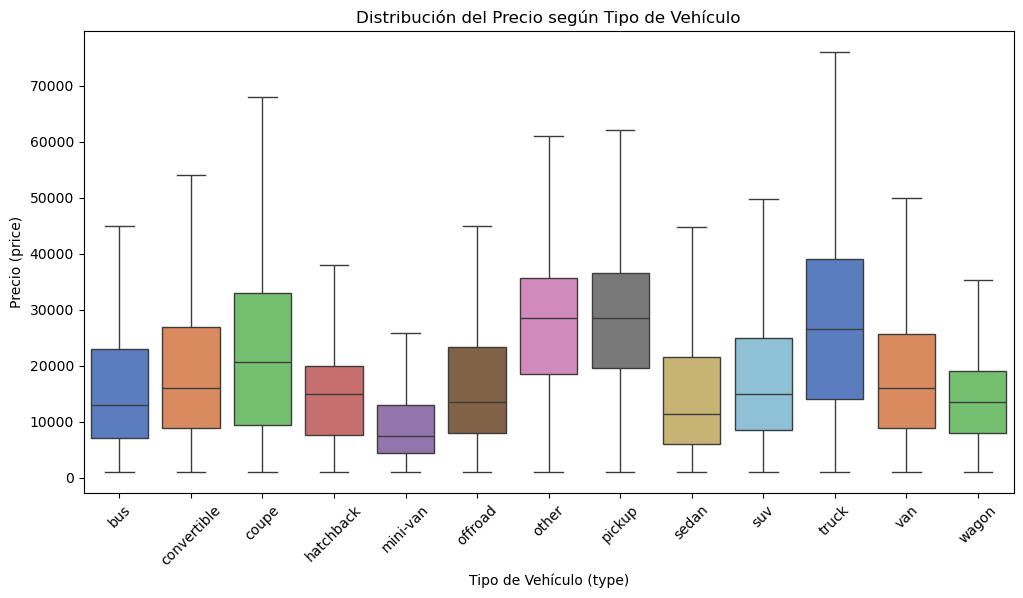

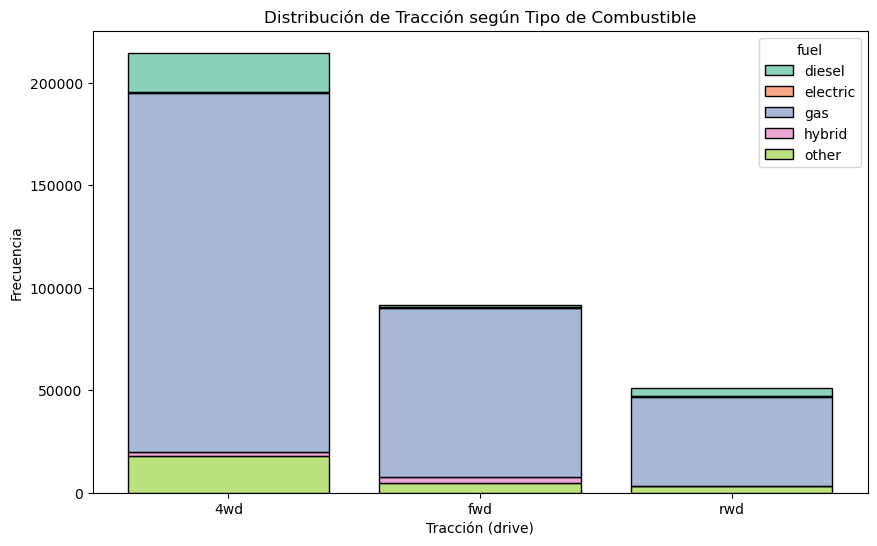

In [42]:
# Crear un gráfico de correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Crear un gráfico de dispersión entre odometer y price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='odometer', y='price', hue='fuel', alpha=0.6)
plt.title('Dispersión entre Odómetro y Precio')
plt.xlabel('Kilometraje (odometer)')
plt.ylabel('Precio (price)')
plt.legend(title='Combustible', loc='upper right')
plt.show()

# Crear un gráfico de cajas entre price y type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='price', showfliers=False, palette='muted')
plt.title('Distribución del Precio según Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo (type)')
plt.ylabel('Precio (price)')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras apilado para drive y fuel
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, x='drive', hue='fuel', multiple='stack', palette='Set2', shrink=0.8
)
plt.title('Distribución de Tracción según Tipo de Combustible')
plt.xlabel('Tracción (drive)')
plt.ylabel('Frecuencia')
plt.show()

1. Matriz de Correlación entre Variables Numéricas
Este gráfico muestra la relación entre las variables numéricas price y odometer.
Se observa una correlación negativa moderada (-0.53) entre el kilometraje (odometer) y el precio (price). Esto sugiere que, en general, a mayor kilometraje, menor es el precio del vehículo.
2. Dispersión entre Odómetro y Precio, Coloreado por Combustible
Este scatter plot muestra cómo el precio del vehículo (price) varía con el kilometraje (odometer), diferenciando por tipo de combustible (fuel).
La mayoría de los vehículos con kilometrajes bajos tienden a tener precios más altos.
Los vehículos eléctricos y algunos híbridos suelen tener precios más elevados, mientras que los vehículos con combustibles como gas o diesel presentan una mayor dispersión de precios.
3. Distribución del Precio según el Tipo de Vehículo
Este boxplot muestra cómo el precio varía según el tipo de vehículo (type).
Vehículos como convertible, coupe, y truck tienden a tener precios más altos en comparación con mini-van, hatchback y wagon.
Los sedanes (sedan) tienen una distribución de precio moderada, mientras que los buses (bus) presentan un rango amplio, posiblemente por diferencias significativas en tamaño y características.
4. Distribución de Tracción según Tipo de Combustible
Este gráfico de barras apiladas muestra la relación entre el tipo de tracción (drive) y el tipo de combustible (fuel).
Los vehículos con tracción 4WD son los más comunes, con una mayoría utilizando gasolina (gas).
Vehículos eléctricos y algunos híbridos son más comunes entre tracciones FWD y RWD, lo que puede estar relacionado con su diseño orientado a eficiencia y tracción delantera.

In [43]:
df.describe()

,price,year,odometer
count,356947.000000,356947,356947.000000
mean,19419.132748,1970-01-01 00:00:00.000002011,94494.724864
min,1000.000000,1970-01-01 00:00:00.000001900,1000.000000
25%,7990.000000,1970-01-01 00:00:00.000002008,40338.000000
50%,15990.000000,1970-01-01 00:00:00.000002013,89082.000000
75%,27990.000000,1970-01-01 00:00:00.000002017,136608.000000
max,200000.000000,1970-01-01 00:00:00.000002022,500000.000000
std,14619.183319,NaN,63406.233168


## 4. Modelado y Evaluación:

### Escalar las características numéricas.

In [44]:
def scale_numeric_features(df, scaler_type="standard"):
    """
    Escala las características numéricas del DataFrame.

    Args:
        df (pd.DataFrame): DataFrame con características numéricas.
        scaler_type (str): Tipo de escalador ('standard' o 'minmax').

    Returns:
        pd.DataFrame: DataFrame con características numéricas escaladas.
    """
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler() if scaler_type == "standard" else MinMaxScaler()
    
    # Escalar características numéricas
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    print(f"Escalado aplicado a las columnas: {numeric_columns}")
    return df

# Escalar el dataset
df = scale_numeric_features(df, scaler_type="standard")  

Escalado aplicado a las columnas: Index(['price', 'odometer'], dtype='object')


### Realizar transformaciones necesarias para las características categóricas.

In [45]:
def transform_categorical_features(df, method="onehot"):
    """
    Transforma las características categóricas del DataFrame.

    Args:
        df (pd.DataFrame): DataFrame con características categóricas.
        method (str): Método de transformación ('onehot' o 'label').

    Returns:
        pd.DataFrame: DataFrame con características categóricas transformadas.
    """
    categorical_columns = df.select_dtypes(include="category").columns
    
    if method == "onehot":
        # One-Hot Encoding
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    elif method == "label":
        # Label Encoding
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    else:
        raise ValueError("Método no reconocido. Usa 'onehot' o 'label'.")
    
    print(f"Transformación aplicada a las columnas: {categorical_columns}")
    return df

# Transformar características categóricas
df = transform_categorical_features(df, method="label")  

Transformación aplicada a las columnas: Index(['id', 'url', 'region', 'region_url', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'image_url', 'description', 'state',
       'lat', 'long'],
      dtype='object')


### Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).

In [46]:
# Seleccionar solo columnas numéricas
X = df.drop(columns=['price'])  # 'price' es la variable objetivo
X = X.select_dtypes(include=[float, int])
y = df['price']
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R^2: {r2_lr}")

Linear Regression:
MSE: 0.5651637058996344
RMSE: 0.7517737065764101
R^2: 0.43648536712164865


In [48]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R^2: {r2_rf}")


Random Forest Regressor:
MSE: 0.13530195574876017
RMSE: 0.36783414163011047
R^2: 0.8650928374812774


El modelo de Random Forest supera ampliamente al modelo de Regresión Lineal en términos de precisión, reducción de error y capacidad de explicar la variabilidad de los datos.

## 5. Optimización del Modelo

### Optimizar el modelo seleccionado utilizando GridSearchCV.

In [49]:
# Espacio de búsqueda reducido
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=2,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Intentar ajuste y guardar progreso si es interrumpido
try:
    grid_search.fit(X_train, y_train)
except KeyboardInterrupt:
    print("Interrumpido. Guardando progreso...")
    joblib.dump(grid_search, 'grid_search_checkpoint.pkl')
    exit()

# Mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
# Predicciones con el mejor modelo
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Resultados del Modelo Optimizado:")
print(f"MSE: {mse_best_rf}")
print(f"RMSE: {rmse_best_rf}")
print(f"R^2: {r2_best_rf}")


Resultados del Modelo Optimizado:
MSE: 0.13530195574876017
RMSE: 0.36783414163011047
R^2: 0.8650928374812774
